# Imports

In [377]:
import pandas as pd
from matplotlib import pyplot as plt

In [378]:
df = pd.read_csv("../data/coded/Open coding 370 - Final coding.tsv", sep='\t')

In [379]:
df.head()

,source,title,description,url,publishedAt,content,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,Flag for checks,Unnamed: 13,resolution movie,resolution topic,final movie,final topic
0,Pitchfork,Beyoncé’s Renaissance Movie Tops U.S. Box Offi...,"In its first weekend, the concert film bested ...",https://pitchfork.com/news/beyonces-renaissanc...,2023-12-03T23:18:18Z,Beyoncés Renaissance movie is the No. 1 movie ...,Tristan,"Renaissance, HG, Godzilla",Box,Michael,"Renaissance, HG, Godzilla",Box,NaN,NaN,"Renaissance, HG, Godzilla",NaN,"Renaissance, HG, Godzilla",Box
1,Digital Trends,What’s new on VOD and Digital in December 2023,What's new on VOD and Digital in December 2023...,https://www.digitaltrends.com/movies/whats-new...,2023-12-04T22:00:07Z,Apple TV+ December is a very quiet month for V...,Tristan,"Trolls, KOTFM",Streaming,Michael,"KOTFM, Trolls",Streaming,NaN,NaN,"KOTFM, Trolls",NaN,"KOTFM, Trolls",Streaming
2,Gizmodo.com,"The Marvels Drama, Fallout TV Show Reveals, an...","It’s been a wild week in the world of sci-fi, ...",https://gizmodo.com/top-entertainment-news-fal...,2023-12-02T15:00:00Z,"Its been a wild week in the world of sci-fi, f...",Tristan,Marvels,NR,Michael,Marvels,NR,NaN,NaN,NaN,NaN,Marvels,NR
3,The A.V. Club,Beyoncé defeats Godzilla Minus One to claim th...,"Move over superhero movies, the hot new thing ...",https://www.avclub.com/beyonce-box-office-rena...,2023-12-03T21:18:00Z,"Move over superhero movies, the hot new thing ...",Tristan,"Renaissance, Godzilla",Box,Michael,Godzilla,Box,Renaissance not mentioned explicitly,NaN,Godzilla,Box,Godzilla,Box
4,The A.V. Club,The Hunger Games: The Ballad of Songbirds & Sn...,"In the latest episode of Binge Club, our exper...",https://www.avclub.com/the-hunger-games-the-ba...,2023-11-14T21:34:54Z,"In the latest episode of Binge Club, our exper...",Tristan,HG,Promo,Michael,HG,Promo,Related to opening soon,NaN,NaN,NaN,HG,Promo


# Cleaning

In [380]:
from enum import Enum


class Headers(Enum):
    coder1 = "coder 1"
    movie1 = "movie 1"
    topic1 = "topic 1"
    coder2 = "coder 2"
    movie2 = "movie 2"
    topic2 = "topic 2"
    final_movie = "final movie"
    final_topic = "final topic"
    title = "title"
    content = "content"


class Movies(Enum):
    Renaissance = "Renaissance"
    Godzilla = "Godzilla"
    Napoleon = "Napoleon"
    Wish = "Wish"
    HungerGames = "HG"
    Trolls = "Trolls"
    Thanksgiving = "Thanksgiving"
    Marvels = "Marvels"
    Five_Night_At_Freddys = "FNAF"
    After_Death = "After Death"
    Killer_of_the_flower_moon = "KOTFM"
    Not_mentioned = "NM"
    Not_relevant = "NR"


class Topics(Enum):
    Box_office = "Box"
    Not_release = "NR"
    Streaming = "Streaming"
    Production = "Prod"
    Plot_and_performances = "Plot"
    Awards = "Awards"
    Promotion = "Promo"


class Coders(Enum):
    Tristan = "Tristan"
    Juan = "Juan"
    Michael = "Michael"
    Jean_Alexandre = "Jean-Alexandre"


In [381]:
df_clean = df.copy()
# only keep columns we need
df_clean = df_clean[
    [
        Headers.title.value,
        Headers.content.value,
        Headers.coder1.value,
        Headers.movie1.value,
        Headers.topic1.value,
        Headers.coder2.value,
        Headers.movie2.value,
        Headers.topic2.value,
        Headers.final_movie.value,
        Headers.final_topic.value,
    ]
]
df_clean

,title,content,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Beyoncé’s Renaissance Movie Tops U.S. Box Offi...,Beyoncés Renaissance movie is the No. 1 movie ...,Tristan,"Renaissance, HG, Godzilla",Box,Michael,"Renaissance, HG, Godzilla",Box,"Renaissance, HG, Godzilla",Box
1,What’s new on VOD and Digital in December 2023,Apple TV+ December is a very quiet month for V...,Tristan,"Trolls, KOTFM",Streaming,Michael,"KOTFM, Trolls",Streaming,"KOTFM, Trolls",Streaming
2,"The Marvels Drama, Fallout TV Show Reveals, an...","Its been a wild week in the world of sci-fi, f...",Tristan,Marvels,NR,Michael,Marvels,NR,Marvels,NR
3,Beyoncé defeats Godzilla Minus One to claim th...,"Move over superhero movies, the hot new thing ...",Tristan,"Renaissance, Godzilla",Box,Michael,Godzilla,Box,Godzilla,Box
4,The Hunger Games: The Ballad of Songbirds & Sn...,"In the latest episode of Binge Club, our exper...",Tristan,HG,Promo,Michael,HG,Promo,HG,Promo
...,...,...,...,...,...,...,...,...,...,...
287,What's The 'O Cholera Czy To Freddy Fazbear' M...,"Over the past year, a viral video of a Polish ...",Juan,NR,NaN,Nolin,FNAF,Promo,NR,NaN
288,Three Awards Bodies Walk Into a Movies Fantasy...,This is the latest edition of the Movies Fanta...,Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
289,2024 Oscars shaping up as a 'Barbenheimer' sequel,"A long time ago relatively, in this short-atte...",Juan,NM,NaN,Nolin,NM,NaN,NM,NaN
290,The Book You Should Read If You Love – Or Hate...,Here's the thing: I don't care that Scott thro...,Juan,Napoleon,Plot,Nolin,Napoleon,Plot,Napoleon,Plot


In [382]:
df_clean = df_clean.dropna(how='all')

In [383]:
df_clean['topic 1'] = df_clean['topic 1'].fillna('N/A')
df_clean['topic 2'] = df_clean['topic 2'].fillna('N/A')
df_clean['final topic'] = df_clean['final topic'].fillna('N/A')
df_clean

/tmp/ipykernel_1412/2879506131.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['topic 1'] = df_clean['topic 1'].fillna('N/A')
/tmp/ipykernel_1412/2879506131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['topic 2'] = df_clean['topic 2'].fillna('N/A')
/tmp/ipykernel_1412/2879506131.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

,title,content,coder 1,movie 1,topic 1,coder 2,movie 2,topic 2,final movie,final topic
0,Beyoncé’s Renaissance Movie Tops U.S. Box Offi...,Beyoncés Renaissance movie is the No. 1 movie ...,Tristan,"Renaissance, HG, Godzilla",Box,Michael,"Renaissance, HG, Godzilla",Box,"Renaissance, HG, Godzilla",Box
1,What’s new on VOD and Digital in December 2023,Apple TV+ December is a very quiet month for V...,Tristan,"Trolls, KOTFM",Streaming,Michael,"KOTFM, Trolls",Streaming,"KOTFM, Trolls",Streaming
2,"The Marvels Drama, Fallout TV Show Reveals, an...","Its been a wild week in the world of sci-fi, f...",Tristan,Marvels,NR,Michael,Marvels,NR,Marvels,NR
3,Beyoncé defeats Godzilla Minus One to claim th...,"Move over superhero movies, the hot new thing ...",Tristan,"Renaissance, Godzilla",Box,Michael,Godzilla,Box,Godzilla,Box
4,The Hunger Games: The Ballad of Songbirds & Sn...,"In the latest episode of Binge Club, our exper...",Tristan,HG,Promo,Michael,HG,Promo,HG,Promo
...,...,...,...,...,...,...,...,...,...,...
286,Kamala Khan Is Marvel’s Not-So-Secret Weapon,The Marvel Cinematic Universe is well past its...,Juan,Marvels,Plot,Nolin,Marvels,Plot,Marvels,Plot
287,What's The 'O Cholera Czy To Freddy Fazbear' M...,"Over the past year, a viral video of a Polish ...",Juan,NR,N/A,Nolin,FNAF,Promo,NR,N/A
288,Three Awards Bodies Walk Into a Movies Fantasy...,This is the latest edition of the Movies Fanta...,Juan,NM,N/A,Nolin,NM,N/A,NM,N/A
289,2024 Oscars shaping up as a 'Barbenheimer' sequel,"A long time ago relatively, in this short-atte...",Juan,NM,N/A,Nolin,NM,N/A,NM,N/A


# Analysis

## Movie counts

In [384]:
df_counts = df_clean.copy()
df_counts["final movie"] = df_counts["final movie"].str.replace(".", ",")
df_counts["final movie"] = df_counts["final movie"].str.split(", ")
counts = df_counts["final movie"].explode("final movie").value_counts()
counts

final movie
KOTFM          54
Marvels        48
HG             47
Godzilla       39
Napoleon       33
NM             33
NR             18
Trolls         15
Renaissance    14
FNAF           11
Wish           10
KOFTM           1
Name: count, dtype: int64

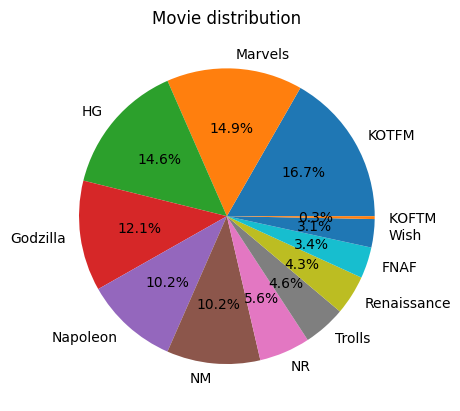

In [385]:
fig = counts.plot(kind='pie', autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')
fig.set_ylabel(None)
fig.set_title('Movie distribution')
plt.show()

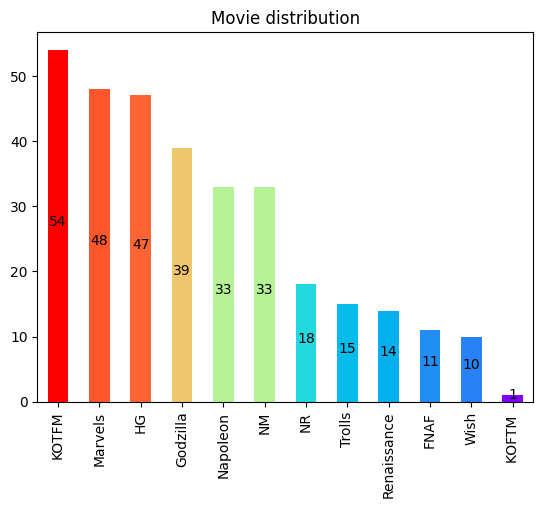

In [386]:
cmap = plt.colormaps['rainbow']
norm = plt.Normalize(counts.min(), counts.max())
colors = [cmap(norm(value)) for value in counts.values]

ax = counts.plot(kind='bar', color=colors)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Movie distribution')

for i, v in enumerate(counts.values):
    ax.text(i, v/2, str(v), color='black', ha='center')

plt.savefig('Movie distribution.png', bbox_inches='tight')
plt.show()

## Topic analysis

In [387]:
df_topics = df_clean.copy()

In [388]:
df_topics['final topic'] = df_topics['final topic'].str.strip()
df_topics["final topic"].value_counts()

final topic
Box          76
Plot         68
N/A          51
Promo        35
NR           16
Streaming    15
Awards       15
Prod         15
Name: count, dtype: int64

In [389]:
df_movie_by_topic = df_clean.copy()
df_movie_by_topic['final movie'] = df_movie_by_topic['final movie'].str.replace(".", ",")
df_movie_by_topic["final movie"] = df_movie_by_topic["final movie"].str.split(", ")
df_movie_by_topic['final movie'] = df_movie_by_topic['final movie'].explode('final movie')
df_movie_by_topic = df_movie_by_topic.groupby('final movie')
df_topic_by_movie = df_movie_by_topic['final topic'].value_counts()

In [390]:
df_topic_by_movie

final movie  final topic
FNAF         Plot           3
             Awards         2
             Prod           2
             NR             1
             Promo          1
                           ..
Wish         Plot           4
             N/A            2
             Box            2
             Prod           1
             Promo          1
Name: count, Length: 69, dtype: int64

In [391]:
topics = pd.DataFrame(df_topic_by_movie.copy())
new_tops = topics.unstack(level=0)

new_tops

count                                                   \
final movie  FNAF Godzilla    HG KOTFM Marvels    NM   NR Napoleon   
final topic                                                          
Awards        2.0      1.0   3.0   3.0     2.0   NaN  NaN      2.0   
Box           1.0      7.0   7.0  15.0    10.0  11.0  6.0      9.0   
Box           NaN      1.0   NaN   NaN     NaN   NaN  NaN      NaN   
N/A           NaN      4.0   6.0   6.0    10.0   7.0  6.0      5.0   
NR            1.0      5.0   2.0   4.0     2.0   2.0  NaN      NaN   
Plot          3.0     12.0  11.0   9.0    12.0   5.0  1.0      6.0   
Prod          2.0      NaN   3.0   3.0     1.0   NaN  NaN      4.0   
Promo         1.0      8.0   8.0   6.0     1.0   4.0  1.0      2.0   
Streaming     1.0      NaN   6.0   3.0     3.0   NaN  1.0      1.0   

                                     
final movie Renaissance Trolls Wish  
final topic                          
Awards              1.0    1.0  NaN  
Box                 5.0    2.0  2.0  
Box                 NaN    NaN  NaN  
N/A                 NaN    5.0  2.0  
NR                  NaN    NaN  NaN  
Plot                3.0    2.0  4.0  
Prod                NaN    1.0  1.0  
Promo               NaN    3.0  1.0  
Streaming           NaN    NaN  NaN

In [392]:
titles = [tup[1] for tup in new_tops.columns.unique()]
titles

['FNAF',
 'Godzilla',
 'HG',
 'KOTFM',
 'Marvels',
 'NM',
 'NR',
 'Napoleon',
 'Renaissance',
 'Trolls',
 'Wish']

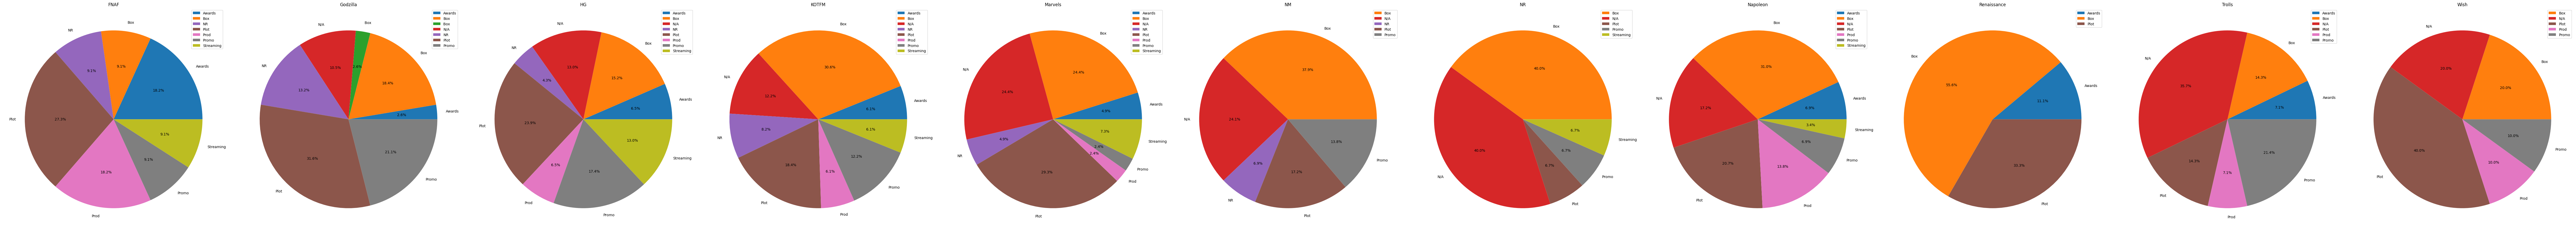

In [393]:
fig = new_tops.plot(kind='pie', subplots=True, figsize=(100,10), autopct=lambda p: '{:.1f}%'.format(p) if p > 0 else '')
axes = fig.flatten()
for ax, title in zip(axes,titles):
    ax.set_title(title)
    ax.set_ylabel(None)
plt.tight_layout()
plt.savefig("topics per movie.png")
plt.show()